In [25]:
import os
import numpy as np
from spacepy import pycdf


# Time Conversion functions

Let's define some helper functions to convert some time formats into human readable time

In [26]:
def time_from_seconds(seconds):
  seconds = seconds % (24 * 3600)
  hour = seconds // 3600
  seconds %= 3600
  minutes = seconds // 60
  seconds %= 60
     
  return "%d:%02d:%02d" % (hour, minutes, seconds)

def time_from_doy(doy):
  part, whole = np.modf(doy)
  seconds = part * 86400
     
  return time_from_seconds(seconds)

In [27]:
print("3600 seconds: %s" %(time_from_seconds(3600)))
print("0.04167 days: %s" %(time_from_doy(0.04167)))

3600 seconds: 1:00:00
0.04167 days: 1:00:00


# WIND ion data

The WIND ion data is our ground truth example data. In machine learning we call this data *Y*. This is what we want to predict but for DSCVR input not WND input. Let's explore the WIND ion data.

The WND ion data is stored locally in the "data/raw/WND/ion/" directory.

In [28]:
WND_ION_DIR = 'data/raw/WND/ion/2022'

!ls -l $WND_ION_DIR | wc -l
!ls -l $WND_ION_DIR/wi_h1_swe_20220514_v01.cdf
!file $WND_ION_DIR/wi_h1_swe_20220514_v01.cdf

238
-rw-rw-r-- 1 1000 1000 642922 Jun  2 04:06 data/raw/WND/ion/2022/wi_h1_swe_20220514_v01.cdf
data/raw/WND/ion/2022/wi_h1_swe_20220514_v01.cdf: FoxPro FPT, blocks size 65535, next free block index 3455254529, field type 0


In [29]:
y_filename = os.path.join(WND_ION_DIR,'wi_h1_swe_20220514_v01.cdf')
cdf_ywnd = pycdf.CDF(y_filename)

In [30]:
print('These are the variables within this file:\n')
print(cdf_ywnd)

These are the variables within this file:

Alpha_Na_nonlin: CDF_FLOAT [787]
Alpha_VX_nonlin: CDF_FLOAT [787]
Alpha_VY_nonlin: CDF_FLOAT [787]
Alpha_VZ_nonlin: CDF_FLOAT [787]
Alpha_V_nonlin: CDF_FLOAT [787]
Alpha_W_nonlin: CDF_FLOAT [787]
Alpha_Wpar_nonlin: CDF_FLOAT [787]
Alpha_Wperp_nonlin: CDF_FLOAT [787]
Alpha_sigmaNa_nonlin: CDF_FLOAT [787]
Alpha_sigmaVX_nonlin: CDF_FLOAT [787]
Alpha_sigmaVY_nonlin: CDF_FLOAT [787]
Alpha_sigmaVZ_nonlin: CDF_FLOAT [787]
Alpha_sigmaV_nonlin: CDF_FLOAT [787]
Alpha_sigmaW_nonlin: CDF_FLOAT [787]
Alpha_sigmaWpar_nonlin: CDF_FLOAT [787]
Alpha_sigmaWperp_nonlin: CDF_FLOAT [787]
Ang_dev: CDF_FLOAT [787]
BX: CDF_FLOAT [787]
BY: CDF_FLOAT [787]
BZ: CDF_FLOAT [787]
ChisQ_DOF_nonlin: CDF_FLOAT [787]
EW_flowangle: CDF_FLOAT [787]
Epoch: CDF_EPOCH [787]
NS_flowangle: CDF_FLOAT [787]
Peak_doy: CDF_DOUBLE [787]
Proton_Np_moment: CDF_FLOAT [787]
Proton_Np_nonlin: CDF_FLOAT [787]
Proton_VX_moment: CDF_FLOAT [787]
Proton_VX_nonlin: CDF_FLOAT [787]
Proton_VY_moment: 

In [31]:
print('This is the global metadata record of the file:\n')
print(cdf_ywnd.attrs)

This is the global metadata record of the file:

ADID_ref: 
Acknowledgement: 
Data_type: VS>Validated Summary Data [CDF_CHAR]
Data_version: 01 [CDF_CHAR]
Descriptor: SWE>Solar Wind Experiment [CDF_CHAR]
Discipline: Space Physics>Magnetospheric Science [CDF_CHAR]
            Space Physics>Interplanetary Studies [CDF_CHAR]
File_naming_convention: source_datatype_descriptor [CDF_CHAR]
Generated_by: Michael L. Stevens (mstevens@cfa.harvard.edu) [CDF_CHAR]
Generation_date: Fri May 27 09:59:25 2022 [CDF_CHAR]
HTTP_LINK: 
Instrument_type: Ephemeris [CDF_CHAR]
                 Plasma and Solar Wind [CDF_CHAR]
                 Magnetic Fields (space) [CDF_CHAR]
LINK_TEXT: 
LINK_TITLE: 
Logical_file_id: wi_h1_swe_20220514_v01 [CDF_CHAR]
Logical_source: wind_vs_swe [CDF_CHAR]
Logical_source_description: Solar wind proton and alpha parameters, including anisotropic temperatures, derived by non-linear fitting of the measurements and with moment techniques. [CDF_CHAR]
MODS: data analysis package rev

# Let's move on to the WIND magnetic field observation data

The magnetic field measurement data from WIND is our input or X. In this case it will be one part of X.
Later we will combine the DSCVR magnetic field data with this WND magnetic field data for training our predictive model.

In [32]:
WND_MFI_DIR = 'data/raw/WND/mfi/2022'
wnd_mfi_sample = 'wi_h2_mfi_20220101_v04.cdf'

!ls -l $WND_MFI_DIR | wc -l
!ls -l $WND_MFI_DIR/wi_h2_mfi_20220514_v04.cdf
!file $WND_MFI_DIR/wi_h2_mfi_20220514_v04.cdf

261
-rw-rw-r-- 1 1000 1000 57471586 Jun  8 04:37 data/raw/WND/mfi/2022/wi_h2_mfi_20220514_v04.cdf
data/raw/WND/mfi/2022/wi_h2_mfi_20220514_v04.cdf: data


In [33]:
xwnd_filename = os.path.join(WND_MFI_DIR,'wi_h2_mfi_20220514_v04.cdf')
cdf_xwnd = pycdf.CDF(xwnd_filename)

In [34]:
print('These are the variables within this file:\n')
print(cdf_xwnd)

These are the variables within this file:

AMPL1_I: CDF_REAL4 [1440, 3, 8]
AMPL1_O: CDF_REAL4 [1440, 3, 8]
BF1: CDF_REAL4 [935602, 1]
BGSE: CDF_REAL4 [935602, 3]
BGSM: CDF_REAL4 [935602, 3]
Epoch: CDF_EPOCH [935602, 1]
Epoch1: CDF_EPOCH [1440, 1]
FLAG1_I: CDF_INT4 [1440, 1]
FLAG1_O: CDF_INT4 [1440, 1]
MAG_MODE: CDF_INT4 [935602, 1]
NUM1_PTS_I: CDF_INT4 [1440, 1]
NUM1_PTS_O: CDF_INT4 [1440, 1]
ORTH1_I: CDF_REAL8 [1440, 3, 3]
ORTH1_O: CDF_REAL8 [1440, 3, 3]
PAYLD1_I: CDF_REAL8 [1440, 3, 3]
PAYLD1_O: CDF_REAL8 [1440, 3, 3]
RANGE: CDF_INT4 [935602, 1]
SENS1_I: CDF_REAL4 [1440, 3, 8]
SENS1_O: CDF_REAL4 [1440, 3, 8]
SPC_MODE: CDF_INT4 [935602, 1]
Time1_PB5: CDF_INT4 [1440, 3]
Time_PB5: CDF_INT4 [935602, 3]
ZERO1_I: CDF_REAL4 [1440, 3, 8]
ZERO1_O: CDF_REAL4 [1440, 3, 8]
cartesian: CDF_CHAR*11 [3] NRV
format_time: CDF_CHAR*2 [3] NRV
label_bgse: CDF_CHAR*8 [3] NRV
label_bgsm: CDF_CHAR*8 [3] NRV
label_time: CDF_CHAR*27 [3] NRV
unit_time: CDF_CHAR*4 [3] NRV


In [35]:
print('This is the global metadata record of the file:\n')
print(cdf_xwnd.attrs)

This is the global metadata record of the file:

ADID_ref: NSSD0141 [CDF_CHAR]
Attitude_file: wi_at_pre_20220513_v02.cdf [CDF_CHAR]
               wi_at_pre_20220514_v02.cdf [CDF_CHAR]
               wi_at_pre_20220515_v02.cdf [CDF_CHAR]
Data_type: H2>High-resolution Definitive Data [CDF_CHAR]
Data_version: 04 [CDF_CHAR]
Descriptor: MFI>Magnetic Fields Investigation [CDF_CHAR]
Discipline: Space Physics>Heliospheric Science [CDF_CHAR]
HKlvl_0_file: wi_lz_scr_20220513_v01.dat [CDF_CHAR]
              wi_lz_scr_20220514_v01.dat [CDF_CHAR]
              wi_lz_scr_20220515_v01.dat [CDF_CHAR]
Instrument_type: Magnetic Fields (space) [CDF_CHAR]
Level_0_file: wi_lz_mfi_20220513_v01.dat [CDF_CHAR]
              wi_lz_mfi_20220514_v01.dat [CDF_CHAR]
              wi_lz_mfi_20220515_v01.dat [CDF_CHAR]
Logical_file_id: wi_h2_mfi_00000000_v00 [CDF_CHAR]
Logical_source: wi_h2_mfi [CDF_CHAR]
Logical_source_description: Wind Magnetic Fields Investigation, High-resolution Definitive Data [CDF_CHAR]
MOD

# DSCVR magnetic field data

The final piece of data that we need is the DSCVR magnetic field observation data. 
As mentioned earlier, we will combine this with the same data observed by WIND. 
We will leave the details of how we do this until later. For now, let's inspect the WIND data

In [36]:
DSC_MFI_DIR = 'data/raw/DSCVR/mfi/2022'
wnd_mfi_sample = 'wi_h2_mfi_20220101_v04.cdf'

!ls $DSC_MFI_DIR | wc -l
!ls -l $DSC_MFI_DIR/dscovr_h0_mag_20220514_v01.cdf
!file $DSC_MFI_DIR/dscovr_h0_mag_20220514_v01.cdf

260
-rw-rw-r-- 1 1000 1000 7283670 Jul 11 04:00 data/raw/DSCVR/mfi/2022/dscovr_h0_mag_20220514_v01.cdf
data/raw/DSCVR/mfi/2022/dscovr_h0_mag_20220514_v01.cdf: data


In [37]:
xdsc_filename = os.path.join(DSC_MFI_DIR,'dscovr_h0_mag_20220514_v01.cdf')
cdf_xdsc = pycdf.CDF(xdsc_filename)

In [38]:
print('These are the variables within this file:\n')
print(cdf_xdsc)

These are the variables within this file:

B1F1: CDF_REAL4 [86400]
B1GSE: CDF_REAL4 [86400, 3]
B1RTN: CDF_REAL4 [86400, 3]
B1SDF1: CDF_REAL4 [86400]
B1SDGSE: CDF_REAL4 [86400, 3]
B1SDRTN: CDF_REAL4 [86400, 3]
Epoch1: CDF_EPOCH [86400]
FLAG1: CDF_INT2 [86400]
NUM1_PTS: CDF_INT4 [86400]
RANGE1: CDF_INT2 [86400]
SENS: CDF_REAL4 [3, 8] NRV
Time1_PB5: CDF_INT4 [86400, 3]
ZERO: CDF_REAL4 [3, 8] NRV
format_time: CDF_CHAR*2 [3] NRV
label_bgse: CDF_CHAR*8 [3] NRV
label_brtn: CDF_CHAR*8 [3] NRV
label_bsdgse: CDF_CHAR*14 [3] NRV
label_bsdrtn: CDF_CHAR*14 [3] NRV
label_time: CDF_CHAR*27 [3] NRV
unit_time: CDF_CHAR*4 [3] NRV


In [39]:
print('This is the global metadata record of the file:\n')
print(cdf_xdsc.attrs)

This is the global metadata record of the file:

Data_type: H0>1-sec Definitive Data [CDF_CHAR]
Data_version: 1 [CDF_CHAR]
Descriptor: MAG>Fluxgate Magnetometer [CDF_CHAR]
Discipline: Space Physics>Heliospheric Science [CDF_CHAR]
File_naming_convention: source_datatype_descriptor_yyyyMMdd [CDF_CHAR]
Instrument_type: Magnetic Fields (space) [CDF_CHAR]
Logical_file_id: dscovr_h0_mag_20220514_v01 [CDF_CHAR]
Logical_source: dscovr_h0_mag [CDF_CHAR]
Logical_source_description: DSCOVR Fluxgate Magnetometer 1-sec Definitive Data [CDF_CHAR]
MODS: 12/01/2016 Initial release [CDF_CHAR]
Mission_group: DSCOVR [CDF_CHAR]
PI_affiliation: UMBC, NASA/GSFC [CDF_CHAR]
PI_name: A. Koval [CDF_CHAR]
Processing_date: Fri Jul  8 22:03:11 2022 UTC [CDF_CHAR]
Project: DSCOVR>Deep Space Climate Observatory [CDF_CHAR]
Software_version: V01.00 [CDF_CHAR]
Source_name: DSCOVR>Deep Space Climate Observatory [CDF_CHAR]
TEXT: DSCOVR Fluxgate Magnetometer 1-sec Definitive Data                               [CDF_CHAR]
T

In [40]:
print('This is the global metadata record of the file:\n')
print(cdf_xdsc['B1GSE'].attrs)

This is the global metadata record of the file:

CATDESC: Magnetic field vector in GSE cartesian coordinates (1 sec) [CDF_CHAR]
DEPEND_0: Epoch1 [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Magnetic field vector in GSE cartesian coordinates (1 sec) [CDF_CHAR]
FILLVAL: -1e+31 [CDF_FLOAT]
FORMAT: E13.6 [CDF_CHAR]
LABL_PTR_1: label_bgse [CDF_CHAR]
MONOTON: FALSE [CDF_CHAR]
SCALEMAX: [14.442259 18.562836 16.361279] [CDF_FLOAT]
SCALEMIN: [-15.509157 -14.402063 -11.871084] [CDF_FLOAT]
SCALETYP: LINEAR [CDF_CHAR]
TIME_RES: 1 sec [CDF_CHAR]
UNITS: nT [CDF_CHAR]
VALIDMAX: [65534. 65534. 65534.] [CDF_FLOAT]
VALIDMIN: [-65534. -65534. -65534.] [CDF_FLOAT]
VAR_TYPE: data [CDF_CHAR]


In [41]:
dsc_B = cdf_xdsc['B1GSE']
wnd_B = cdf_xwnd['BGSE']

In [42]:
import matplotlib.pyplot as plt

In [43]:
colormap='inferno'
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

Let's plot 1 hour of data from WIND and DSCVR for the same time.
Remember that these two satellites are in different places in space for a given time.
So we don't expect these plots to be correlated.

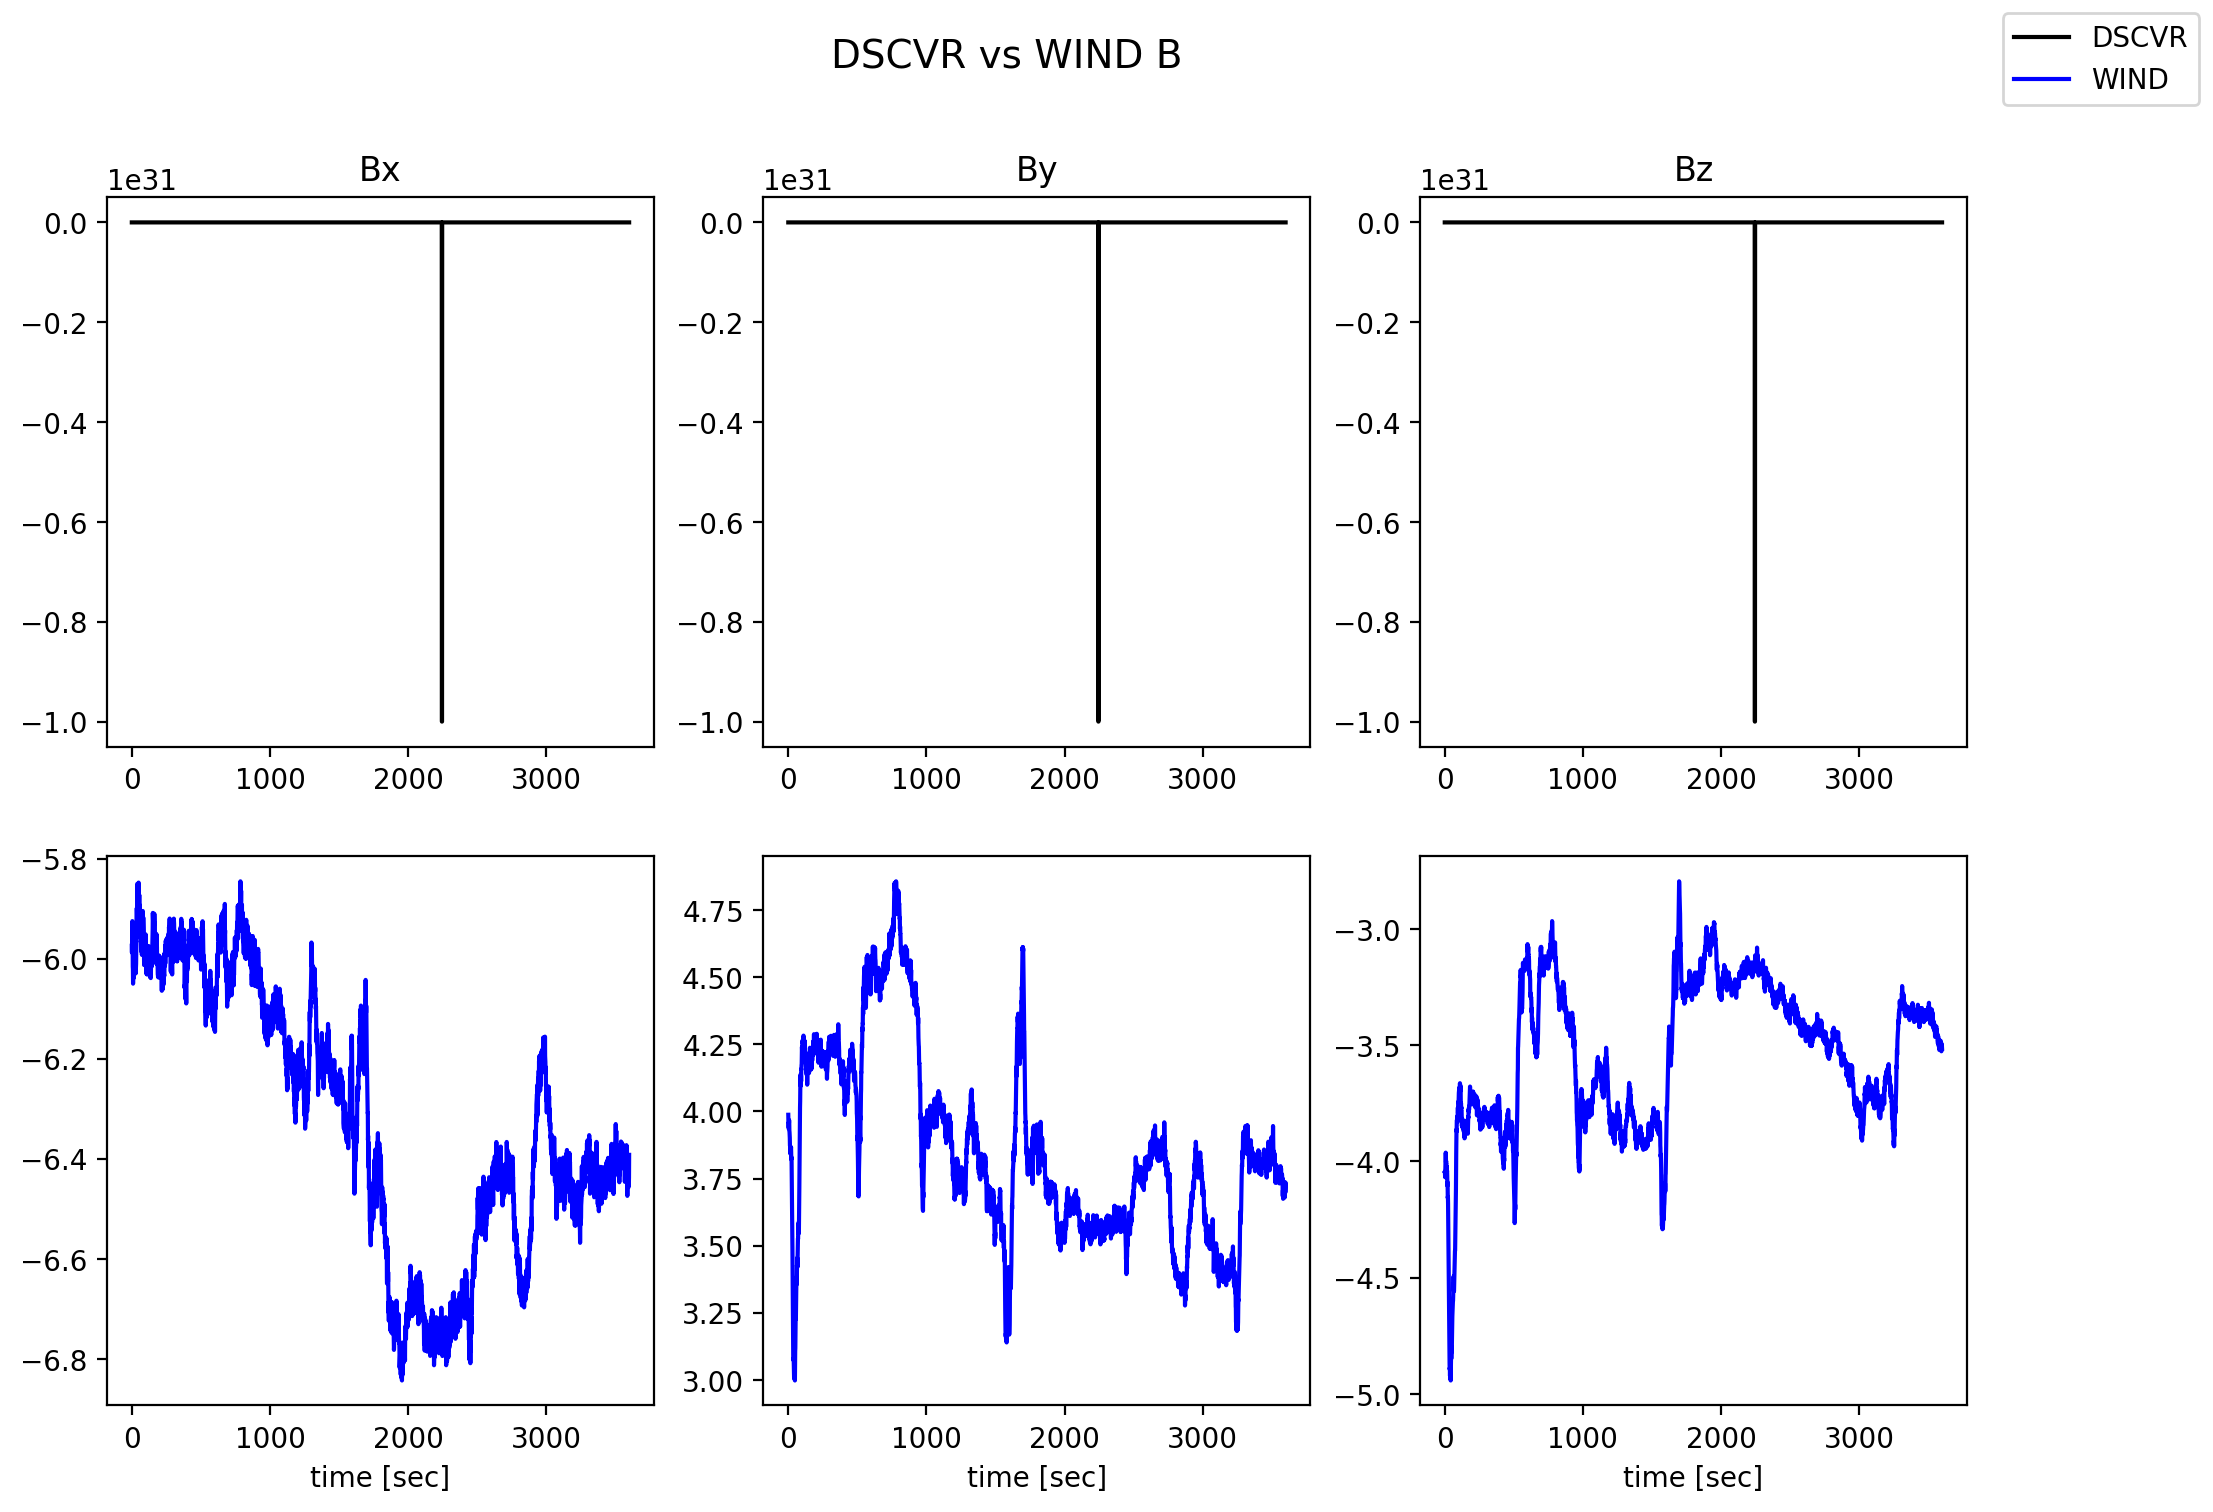

In [44]:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

fig, axs = plt.subplots(2, 3)
title = 'DSCVR vs WIND B'
fig.suptitle(title, fontsize=14)
start = 0
stop = 3600
time_axis = np.linspace(start, stop, num=stop-start, endpoint=False)

d_bx, = axs[0,0].plot(time_axis, dsc_B[start:stop,0], color='black', label='Bx')
d_by, = axs[0,1].plot(time_axis, dsc_B[start:stop,1],color='black', label='By')
d_bz, = axs[0,2].plot(time_axis, dsc_B[start:stop,2],color='black', label='Bz')
axs[0, 0].set(title='Bx')
axs[0, 1].set(title='By')
axs[0, 2].set(title='Bz')
#axs[0, 0].set(xlim=(-500,1500))
axs[1, 0].set(xlabel='time [sec]')
axs[1, 1].set(xlabel='time [sec]')
axs[1, 2].set(xlabel='time [sec]')

w_bx, = axs[1,0].plot(time_axis, wnd_B[start:stop,0], color='blue', label='Bx')
w_by, = axs[1,1].plot(time_axis, wnd_B[start:stop,1],color='blue', label='By')
w_bz, = axs[1,2].plot(time_axis, wnd_B[start:stop,2],color='blue', label='Bz')

fig.legend([d_bx, w_bx], ['DSCVR', 'WIND'], loc='upper right')

Yikes! What is going on with the DSCVR data? 
There are some bad data points getting plotted that are skewing the range of the plot.

We will build a filter later so for now let's restrict the plot range to a reasonable scale.

Also, some values are negative and others are positive. We need to orient the axes with the minimum values at the bottom.

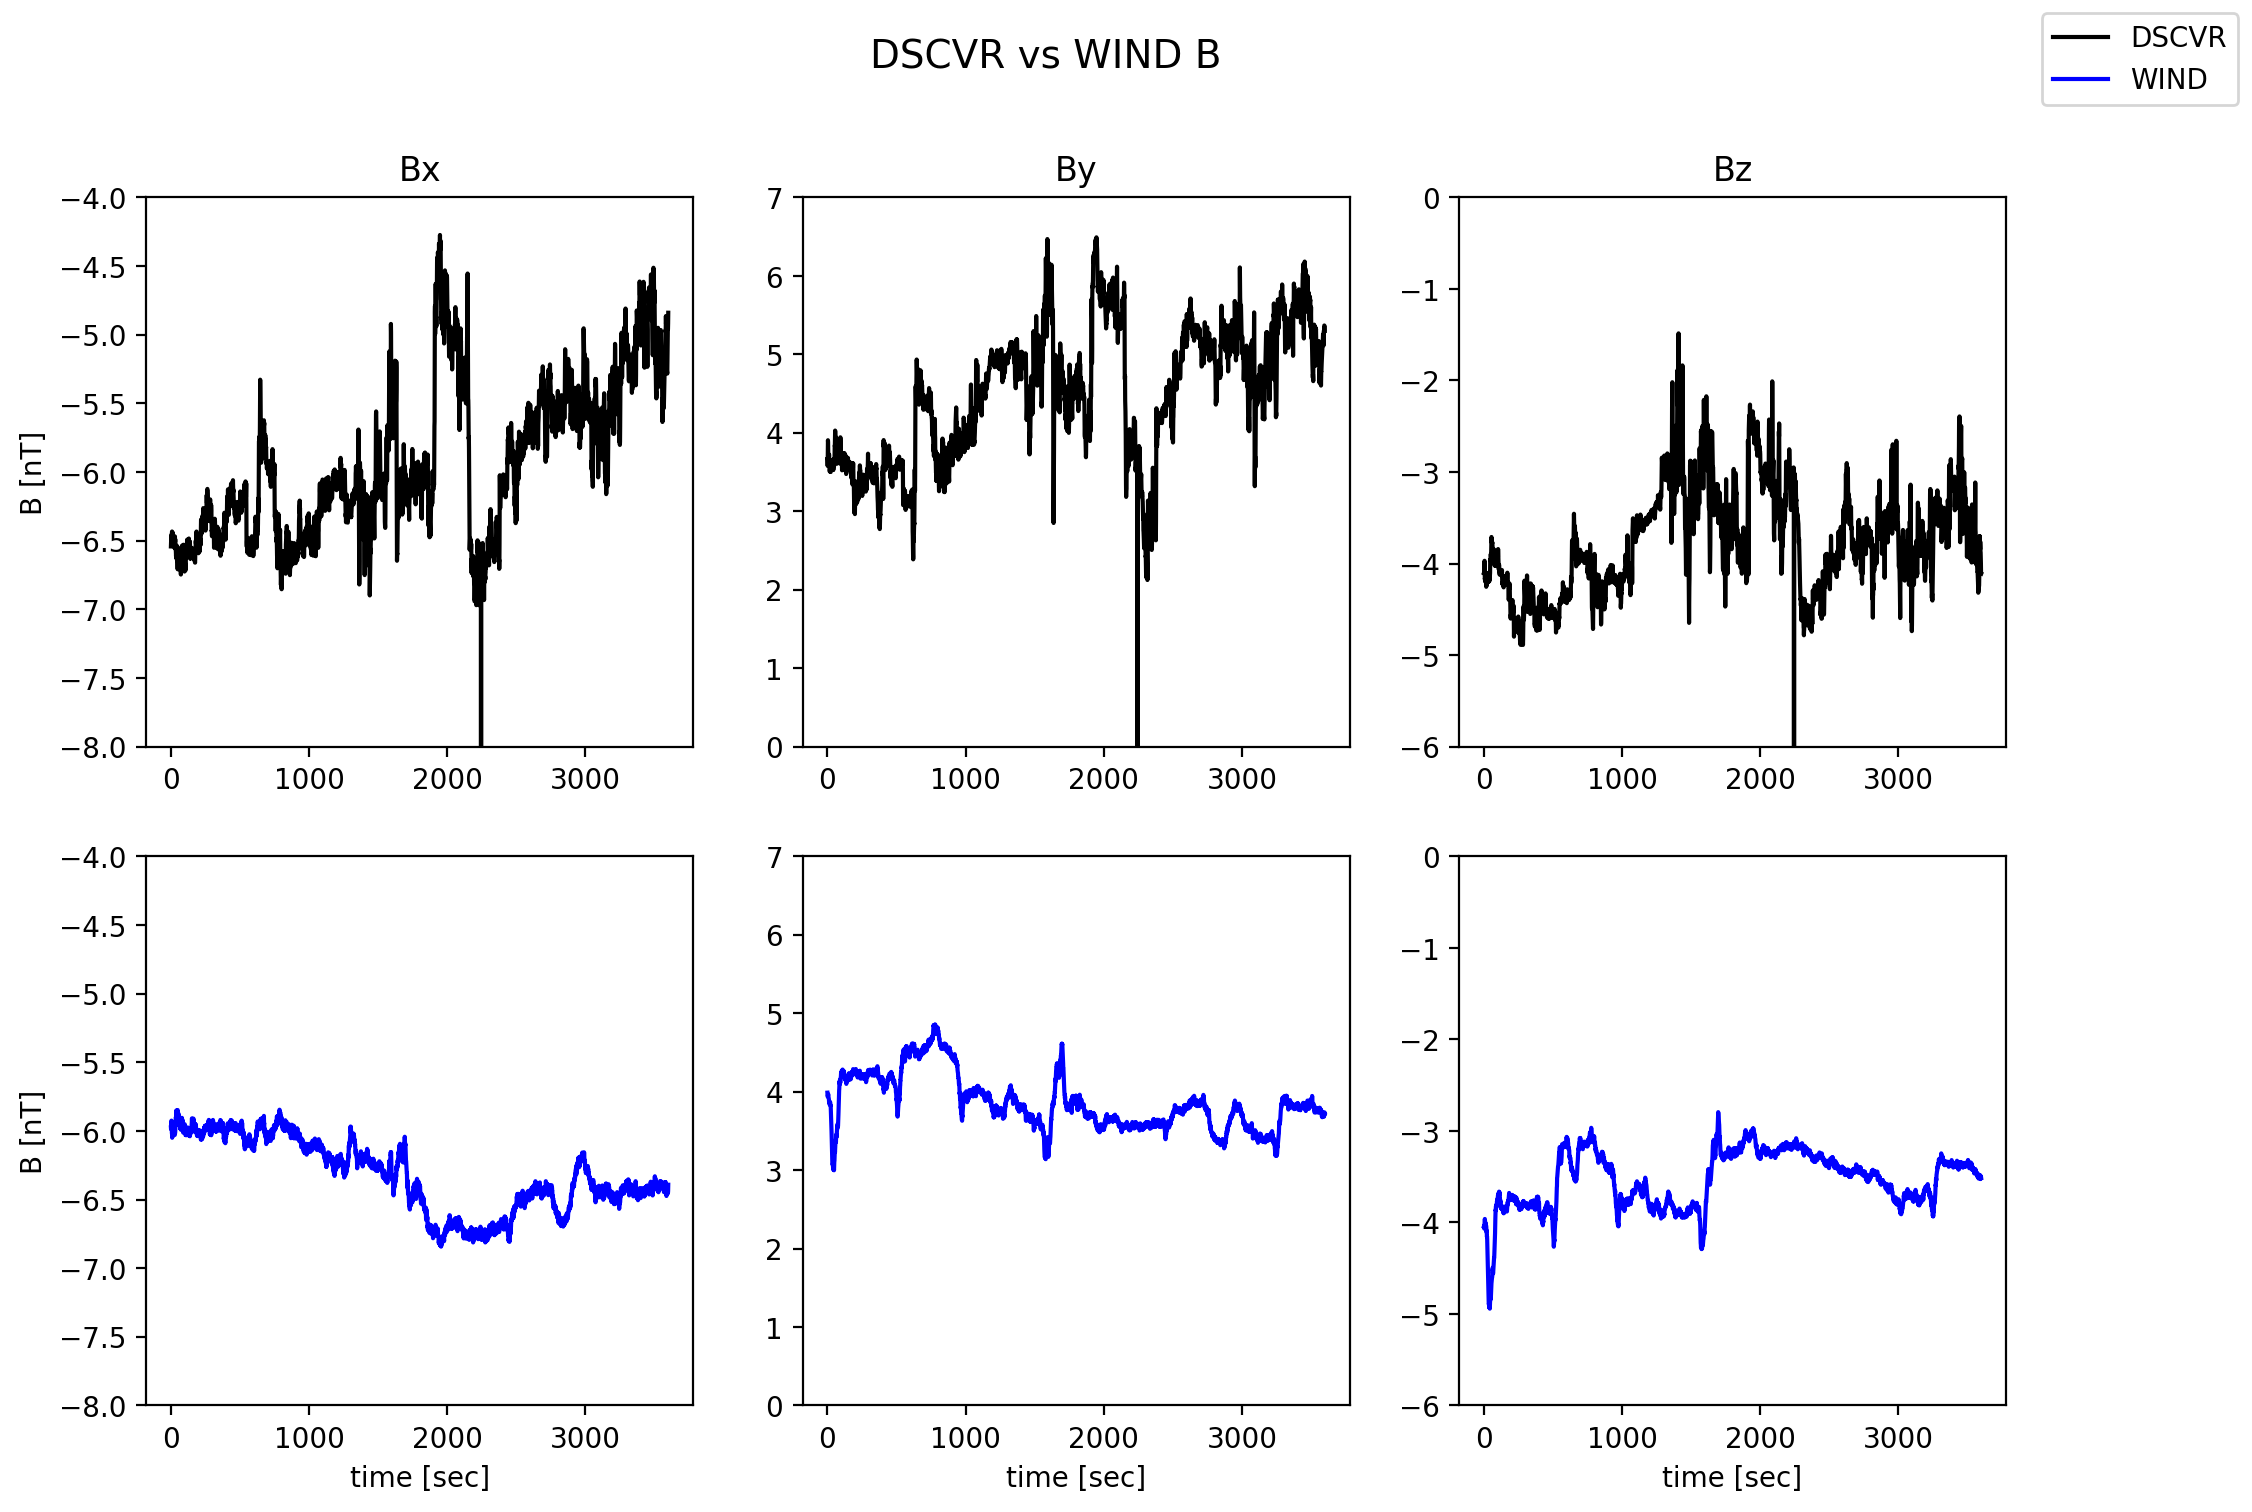

In [45]:
fig, axs = plt.subplots(2, 3)
title = 'DSCVR vs WIND B'
fig.suptitle(title, fontsize=14)
start = 0
stop = 3600
time_axis = np.linspace(start, stop, num=stop-start, endpoint=False)

d_bx, = axs[0,0].plot(time_axis, dsc_B[start:stop,0], color='black', label='Bx')
d_by, = axs[0,1].plot(time_axis, dsc_B[start:stop,1],color='black', label='By')
d_bz, = axs[0,2].plot(time_axis, dsc_B[start:stop,2],color='black', label='Bz')
axs[0, 0].set(title='Bx', ylabel='B [nT]')
axs[0, 1].set(title='By')
axs[0, 2].set(title='Bz')
axs[1, 0].set(xlabel='time [sec]', ylabel='B [nT]')
axs[1, 1].set(xlabel='time [sec]')
axs[1, 2].set(xlabel='time [sec]')
axs[0, 0].set(ylim=(-8,-4))
axs[0, 1].set(ylim=(0,7))
axs[0, 2].set(ylim=(-6,0))
axs[1, 0].set(ylim=(-8,-4))
axs[1, 1].set(ylim=(0,7))
axs[1, 2].set(ylim=(-6,0))

w_bx, = axs[1,0].plot(time_axis, wnd_B[start:stop,0], color='blue', label='Bx')
w_by, = axs[1,1].plot(time_axis, wnd_B[start:stop,1],color='blue', label='By')
w_bz, = axs[1,2].plot(time_axis, wnd_B[start:stop,2],color='blue', label='Bz')

fig.legend([d_bx, w_bx], ['DSCVR', 'WIND'], loc='upper right')

Well that looks more like it! We will come back to removing the invalid data from the input.
Let's move on to plotting the WIND ion data

In [46]:
wnd_V = {}
wnd_V[0] = cdf_ywnd['Proton_VX_nonlin']
wnd_V[1] = cdf_ywnd['Proton_VY_nonlin']
wnd_V[2] = cdf_ywnd['Proton_VZ_nonlin']
wnd_doy = cdf_ywnd['doy']

In [47]:
print('V dim: ',wnd_V[0].shape)
print('doy dim: ',wnd_doy.shape)

V dim:  (787,)
doy dim:  (787,)


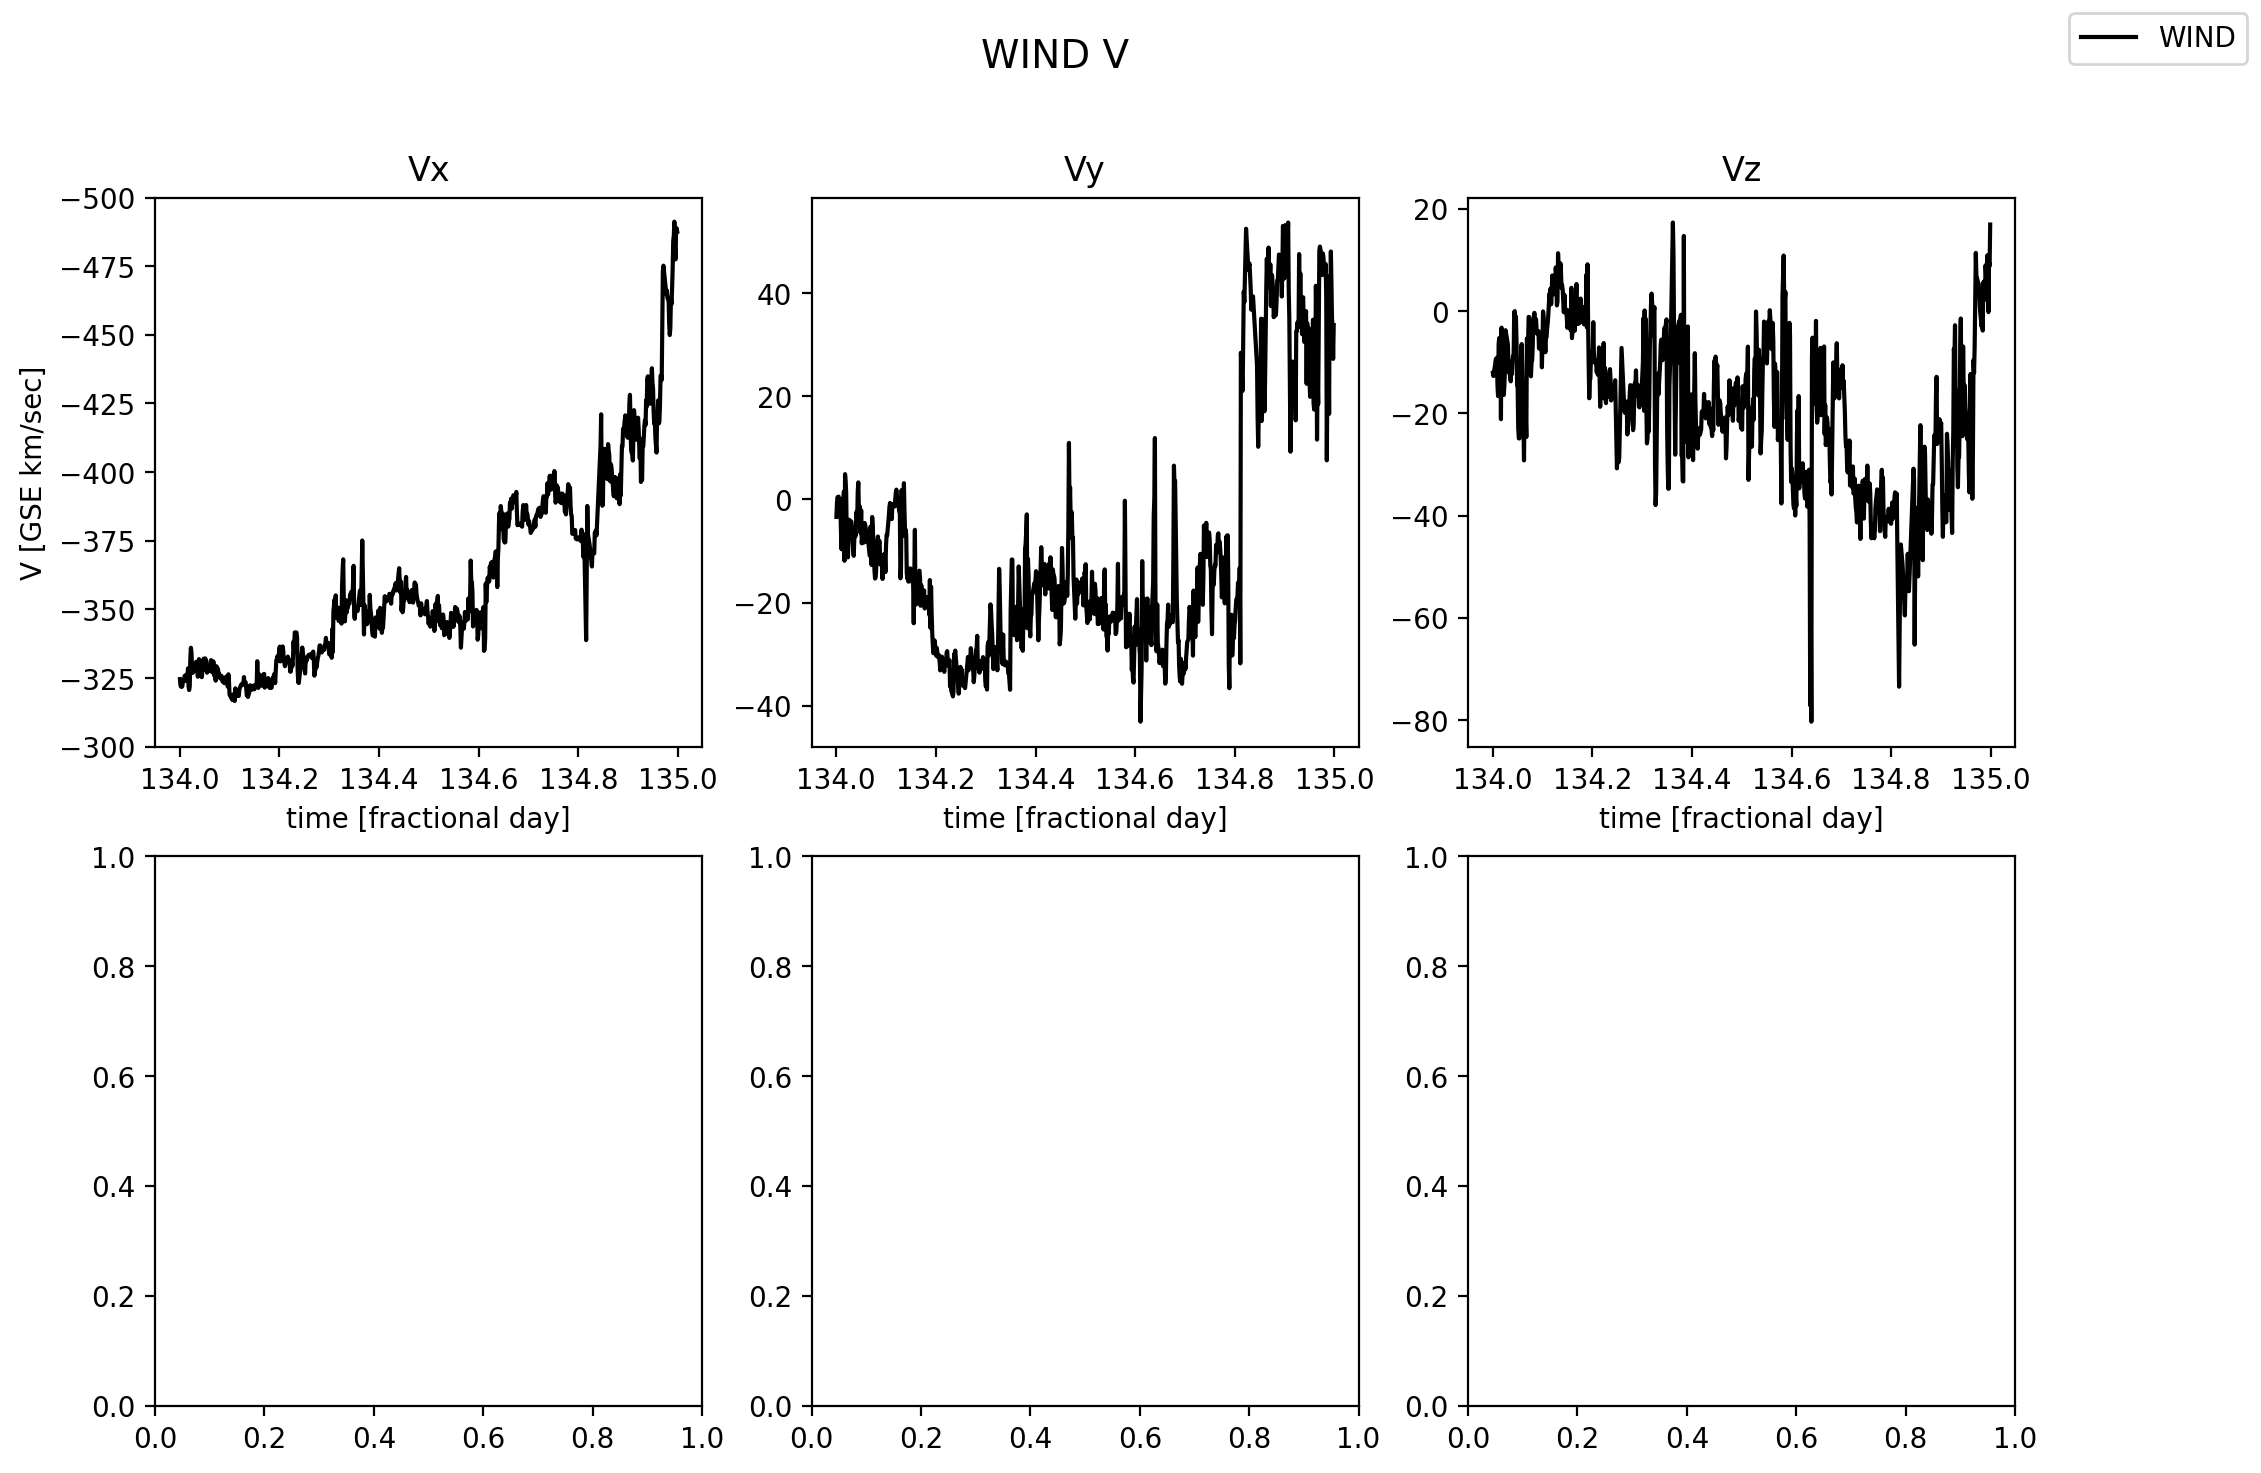

In [48]:
fig, axs = plt.subplots(2, 3)
title = 'WIND V'
fig.suptitle(title, fontsize=14)
start = 0
stop = wnd_doy.shape[0]
#time_axis = np.linspace(start, stop, num=stop-start, endpoint=False)
time_axis = wnd_doy

w_bx, = axs[0,0].plot(time_axis, wnd_V[0], color='black', label='Vx')
w_by, = axs[0,1].plot(time_axis, wnd_V[1],color='black', label='Vy')
w_bz, = axs[0,2].plot(time_axis, wnd_V[2],color='black', label='Vz')
axs[0, 0].set(title='Vx')
axs[0, 1].set(title='Vy')
axs[0, 2].set(title='Vz')
axs[0, 0].set(xlabel='time [fractional day]', ylabel='V [GSE km/sec]')
axs[0, 1].set(xlabel='time [fractional day]')
axs[0, 2].set(xlabel='time [fractional day]')
axs[0, 0].set(ylim=(-300,-500))
#axs[0, 1].set(ylim=(0,7))
#axs[0, 2].set(ylim=(-6,0))
#axs[1, 0].set(ylim=(-8,-4))
#axs[1, 1].set(ylim=(0,7))
#axs[1, 2].set(ylim=(-6,0))

fig.legend([w_bx], ['WIND'], loc='upper right')